In [0]:
import numpy as np
import matplotlib.pyplot as plt

from keras import models, layers
from keras.datasets import mnist, fashion_mnist
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping

%matplotlib inline

Using TensorFlow backend.


In [0]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dens

In [0]:
checkpointer = ModelCheckpoint(filepath='mnist.weights.best.hdf5', verbose=1, save_best_only=True)
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2, callbacks=[checkpointer])

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 9s 190us/step - loss: 0.2139 - acc: 0.9326 - val_loss: 0.0623 - val_acc: 0.9813

Epoch 00001: val_loss improved from inf to 0.06231, saving model to mnist.weights.best.hdf5
Epoch 2/5
48000/48000 [==============================] - 8s 158us/step - loss: 0.0519 - acc: 0.9838 - val_loss: 0.0477 - val_acc: 0.9855

Epoch 00002: val_loss improved from 0.06231 to 0.04770, saving model to mnist.weights.best.hdf5
Epoch 3/5
48000/48000 [==============================] - 8s 157us/step - loss: 0.0362 - acc: 0.9885 - val_loss: 0.0384 - val_acc: 0.9874

Epoch 00003: val_loss improved from 0.04770 to 0.03840, saving model to mnist.weights.best.hdf5
Epoch 4/5
48000/48000 [==============================] - 8s 157us/step - loss: 0.0279 - acc: 0.9912 - val_loss: 0.0394 - val_acc: 0.9897

Epoch 00004: val_loss did not improve from 0.03840
Epoch 5/5
48000

In [0]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 82us/step


[0.0353250877879298, 0.9891]

(28, 28, 1)
(1, 28, 28, 1)


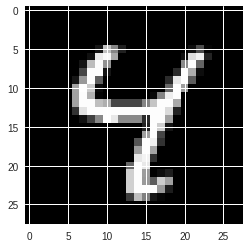

In [0]:
test_image = test_images[6]
print(test_image.shape)
test_tensor = np.expand_dims(test_image, axis=0)
print(test_tensor.shape)
plt.imshow(test_image.reshape(28,28), cmap='gray')

In [0]:
print(len(model.layers))

# Get all the layers output
layer_outputs = [layer.output for layer in model.layers[:5]]

print(len(layer_outputs))

# Create a new model with those outputs, given the previous model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

8
5


(1, 26, 26, 32)


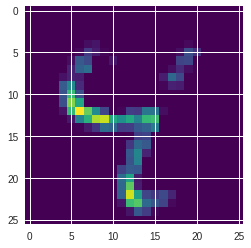

In [0]:
activations = activation_model.predict(test_tensor)

print(activations[0].shape)

plt.imshow(activations[0][0, :,:,3], cmap='viridis')

conv2d_1 2
max_pooling2d_1 2
conv2d_2 4
max_pooling2d_2 4
conv2d_3 4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


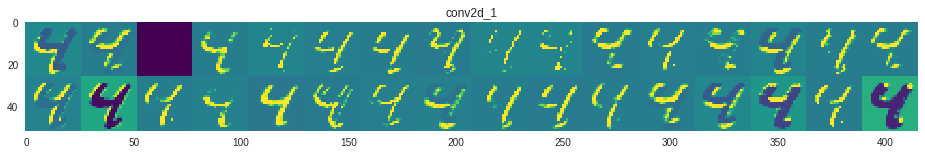

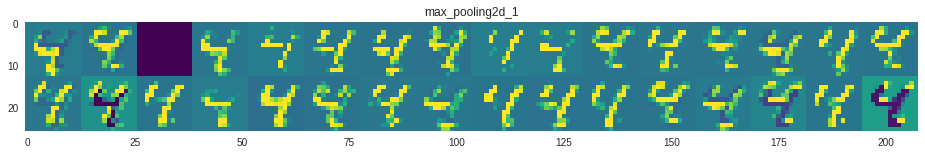

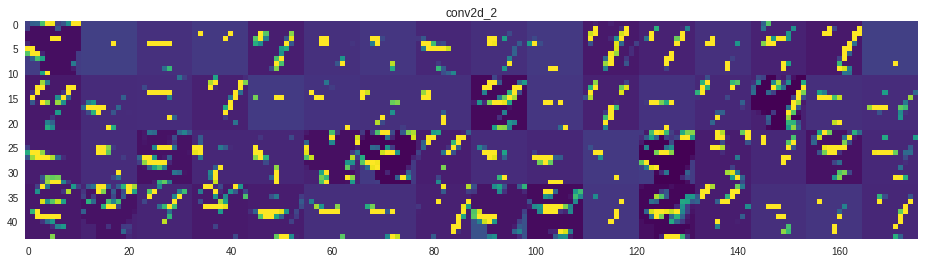

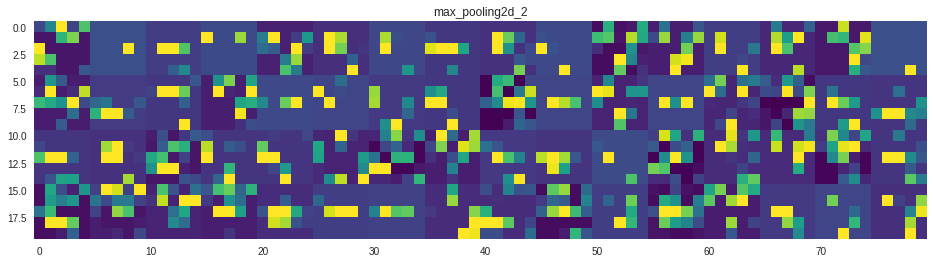

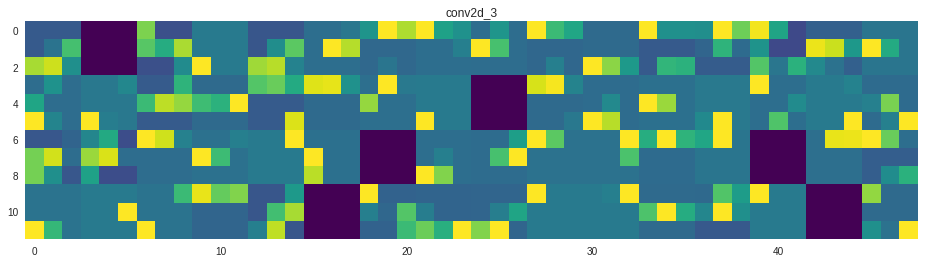

In [0]:
images_per_row = 16

layer_names = [layer.name for layer in model.layers[:5]]

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  
  size = layer_activation.shape[1]
  
  n_cols = n_features // images_per_row
  
  print(layer_name, n_cols)
  
  display_grid = np.zeros((size*n_cols, images_per_row * size))
  
  for col in range(n_cols): 
    for row in range(images_per_row): 
      channel_image = layer_activation[0, :, :, col * images_per_row + row] 
      # Post-process the feature to make it visually palatable 
      channel_image -= channel_image.mean() 
      channel_image /= channel_image.std() 
      channel_image *= 64 
      channel_image += 128 
      channel_image = np.clip(channel_image, 0, 255).astype('uint8') 
      display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
      
  # Display the grid 
  scale = 1. / size 
  plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0])) 
  plt.title(layer_name) 
  plt.grid(False) 
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [0]:
(fashion_images, fashion_labels),(fashion_test_images, fashion_test_labels) = fashion_mnist.load_data()

fashion_images = fashion_images.reshape((60000, 28, 28, 1))
fashion_images = fashion_images.astype('float32')/255

fashion_test_images = fashion_test_images.reshape((10000, 28, 28, 1))
fashion_test_images = fashion_test_images.astype('float32')/255

fashion_labels = to_categorical(fashion_labels)
fashion_test_labels = to_categorical(fashion_test_labels)

4423680/4422102 [==============================] - 2s 0us/step


In [0]:
fashion_model = models.Sequential()

fashion_model.add(layers.Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
fashion_model.add(layers.Conv2D(32, (3,3), strides=1, padding='same', activation='relu'))
fashion_model.add(layers.BatchNormalization(axis=-1))
fashion_model.add(layers.MaxPooling2D((2,2)))

#fashion_model.add(layers.Dropout(0.25))
fashion_model.add(layers.SpatialDropout2D(0.40))

fashion_model.add(layers.Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
fashion_model.add(layers.Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
fashion_model.add(layers.BatchNormalization(axis=-1))
fashion_model.add(layers.MaxPooling2D((2,2)))

#fashion_model.add(layers.Dropout(0.25))
fashion_model.add(layers.SpatialDropout2D(0.40))

fashion_model.add(layers.Flatten())
fashion_model.add(layers.Dense(512, activation='relu'))

fashion_model.add(layers.Dropout(0.5))

fashion_model.add(layers.Dense(10, activation='softmax'))

fashion_model.summary()

fashion_model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
___________________________

In [0]:
fashion_checkpointer = ModelCheckpoint(filepath='fashion.weights.best.hdf5', verbose=1, save_best_only=True)
fashion_earlyStop = EarlyStopping(monitor='val_loss', patience=5)

#fashion_model.load_weights('fashion.weights.best.hdf5')
fashion_model.fit(fashion_images, fashion_labels, epochs=25, batch_size=256, validation_split=0.2, callbacks=[fashion_checkpointer, fashion_earlyStop])

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 9s 178us/step - loss: 0.1627 - acc: 0.9396 - val_loss: 0.1813 - val_acc: 0.9361

Epoch 00001: val_loss improved from inf to 0.18132, saving model to fashion.weights.best.hdf5
Epoch 2/25
48000/48000 [==============================] - 8s 175us/step - loss: 0.1575 - acc: 0.9422 - val_loss: 0.1901 - val_acc: 0.9323

Epoch 00002: val_loss did not improve from 0.18132
Epoch 3/25
48000/48000 [==============================] - 8s 175us/step - loss: 0.1521 - acc: 0.9435 - val_loss: 0.1840 - val_acc: 0.9353

Epoch 00003: val_loss did not improve from 0.18132
Epoch 4/25
48000/48000 [==============================] - 8s 175us/step - loss: 0.1525 - acc: 0.9439 - val_loss: 0.1810 - val_acc: 0.9367

Epoch 00004: val_loss improved from 0.18132 to 0.18104, saving model to fashion.weights.best.hdf5
Epoch 5/25
48000/48000 [==============================] - 8s 174us/step - loss: 0.1473 - acc: 0.9437

In [0]:
fashion_model.load_weights('fashion.weights.best.hdf5')
fashion_model.evaluate(fashion_test_images, fashion_test_labels)

10000/10000 [==============================] - 1s 132us/step


[0.19992004889398812, 0.9332]

(28, 28, 1)
(1, 28, 28, 1)


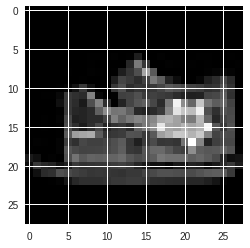

In [0]:
fashion_test_image = fashion_test_images[-1]
print(fashion_test_image.shape)
fashion_test_tensor = np.expand_dims(fashion_test_image, axis=0)
print(fashion_test_tensor.shape)
plt.imshow(fashion_test_image.reshape(28,28), cmap='gray')

In [0]:
print(len(fashion_model.layers))

# Get all the layers output
fashion_layer_outputs = [layer.output for layer in fashion_model.layers[:10]]

print(len(fashion_layer_outputs))

# Create a new model with those outputs, given the previous model input
fashion_activation_model = models.Model(inputs=fashion_model.input, outputs=fashion_layer_outputs)

14
10


(1, 28, 28, 32)


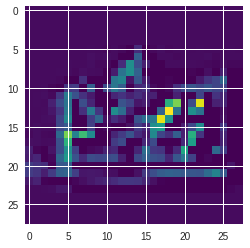

In [0]:
fashion_activations = fashion_activation_model.predict(fashion_test_tensor)

print(fashion_activations[0].shape)

plt.imshow(fashion_activations[0][0, :,:,3], cmap='viridis')

conv2d_4 2
conv2d_5 2
batch_normalization_1 2
max_pooling2d_3 2
spatial_dropout2d_1 2
conv2d_6 4
conv2d_7 4
batch_normalization_2 4
max_pooling2d_4 4
spatial_dropout2d_2 4


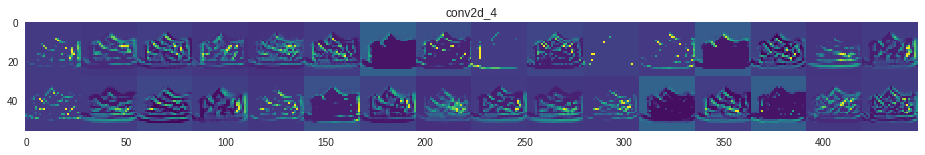

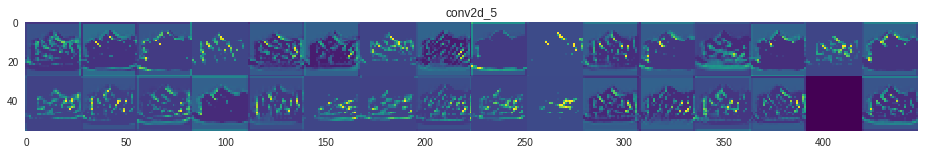

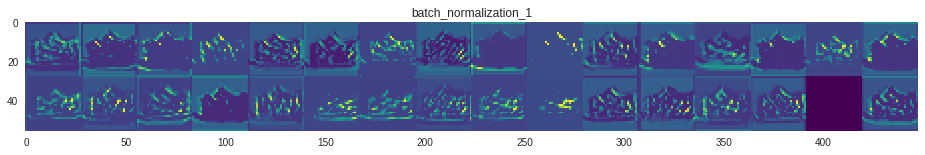

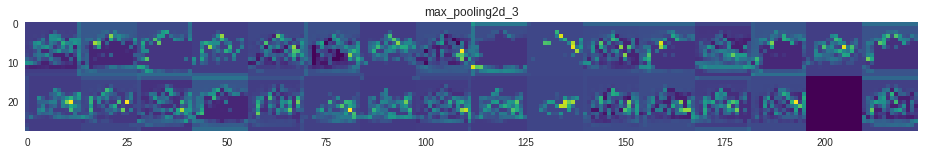

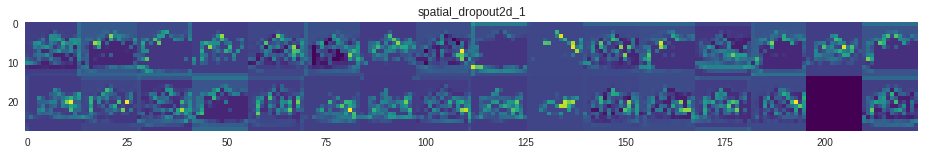

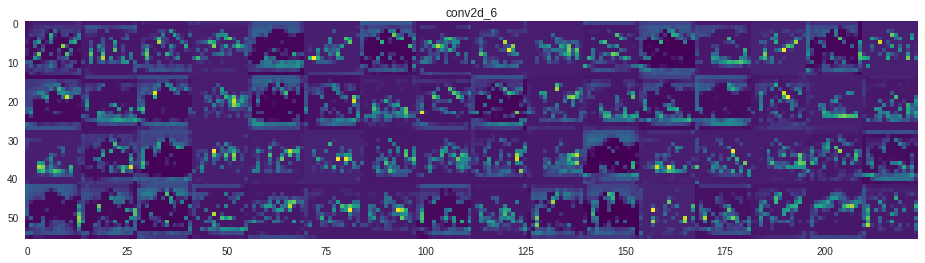

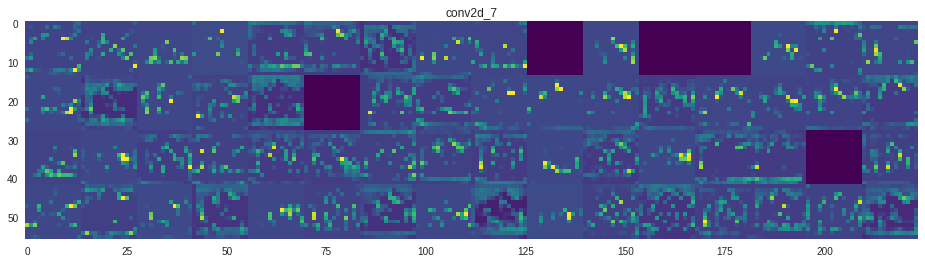

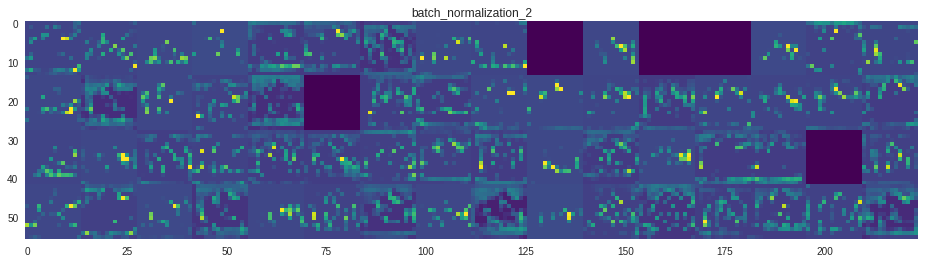

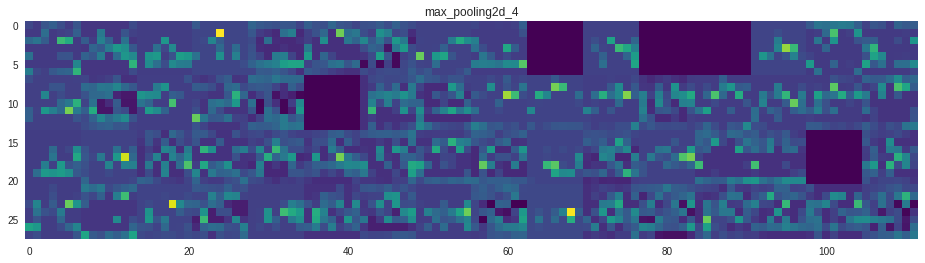

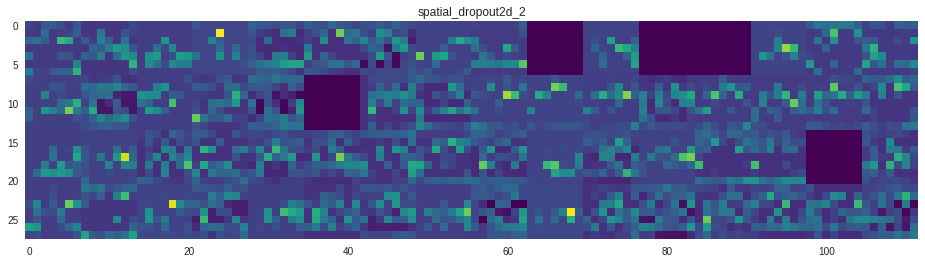

In [0]:
images_per_row = 16

fashion_layer_names = [layer.name for layer in fashion_model.layers[:10]]

for layer_name, layer_activation in zip(fashion_layer_names, fashion_activations):
  n_features = layer_activation.shape[-1]
  
  size = layer_activation.shape[1]
  
  n_cols = n_features // images_per_row
  
  print(layer_name, n_cols)
  
  display_grid = np.zeros((size*n_cols, images_per_row * size))
  
  for col in range(n_cols): 
    for row in range(images_per_row): 
      channel_image = layer_activation[0, :, :, col * images_per_row + row] 
      # Post-process the feature to make it visually palatable 
      channel_image -= channel_image.mean() 
      channel_image /= channel_image.std() 
      channel_image *= 32 
      channel_image += 64 
      channel_image = np.clip(channel_image, 0, 255).astype('uint8') 
      display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
      
  # Display the grid 
  scale = 1. / size 
  plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0])) 
  plt.title(layer_name) 
  plt.grid(False) 
  plt.imshow(display_grid, aspect='auto', cmap='viridis')